<a href="https://colab.research.google.com/github/dyinghorizon/VR_Assignment1_Nishad_MT2024102/blob/main/Coin_Detection_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Imports

import os
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2 as cv
from skimage.filters import sobel
from skimage.filters import gaussian

In [47]:
#Helper Functions

def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

def plot_comparison(original, filtered, title_filt):

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 9), sharex= True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filt)
  ax2.axis('off')

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

In [48]:
# Load The Image

filename = '/content/coins.jpg'
coins = ski.io.imread(filename)

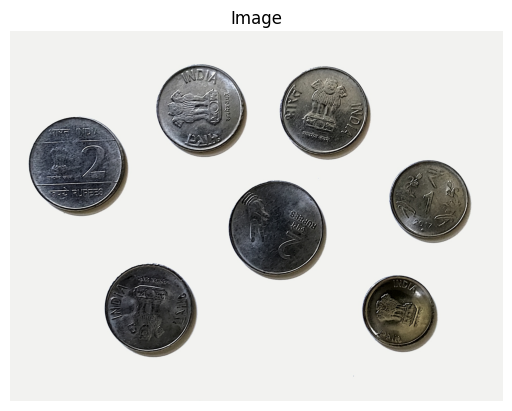

In [49]:
show_image(coins)

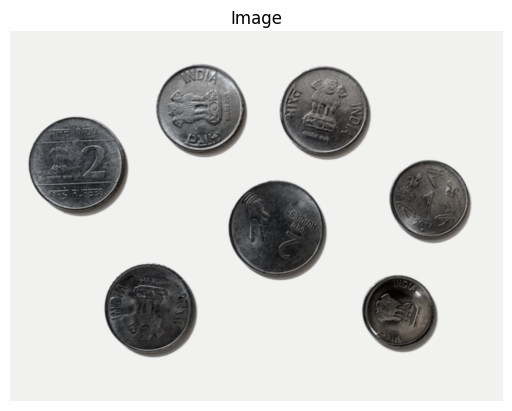

In [50]:
# Denoising the image for better edge detection

from skimage.filters import gaussian

denoised_coins = gaussian(coins, sigma=2)
show_image(denoised_coins)

In [51]:
# Converting RGB image to grayscale

from skimage import color

gray_coins = color.rgb2gray(denoised_coins)

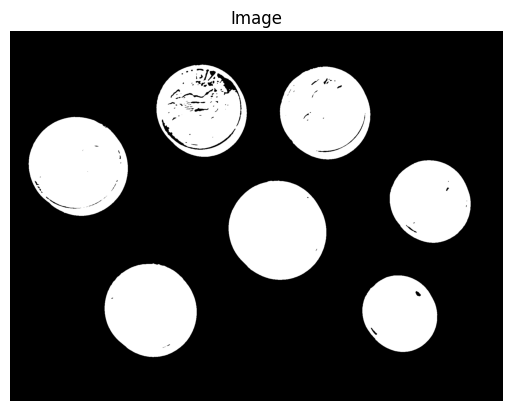

In [53]:
negative = 1- binary_global
show_image(negative)

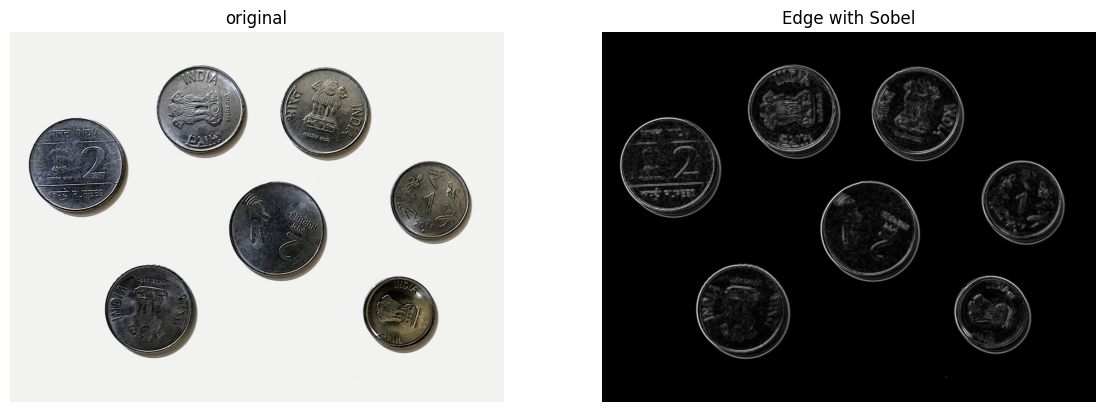

In [62]:
# edge_sobel = sobel(gray_coins)
edge_sobel = sobel(gray_coins)

plot_comparison(coins, edge_sobel, "Edge with Sobel")

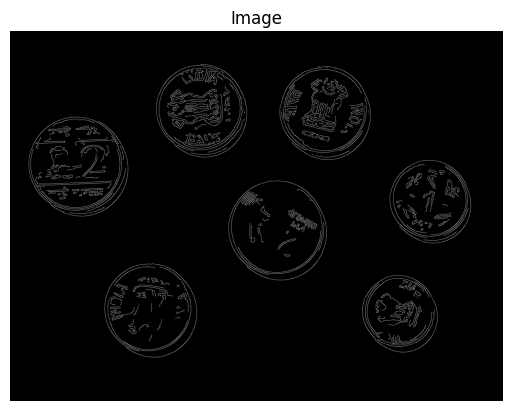

In [55]:
from skimage.feature import canny

canny_edge = canny(gray_coins, sigma=2)

show_image(canny_edge)

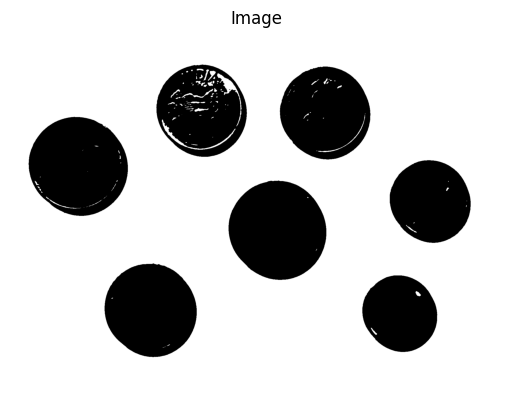

In [52]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value
thresh = threshold_otsu(gray_coins)

# Apply thresholding to the image
binary_global = gray_coins > thresh

show_image(binary_global)

In [56]:
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary_global, 0.8)

Number of Coins: 7. 


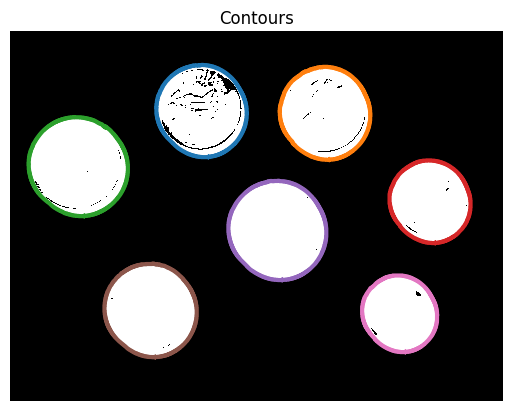

In [58]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 1200 as the minimum size of the shape
min_dots_shape = 1200

# Count dots in contours excluding smaller than given shape size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] > min_dots_shape]

# Shows all contours found
show_image_contour(binary_global, dots_contours)

# Print the number of coins
print("Number of Coins: {}. ".format(len(dots_contours)))

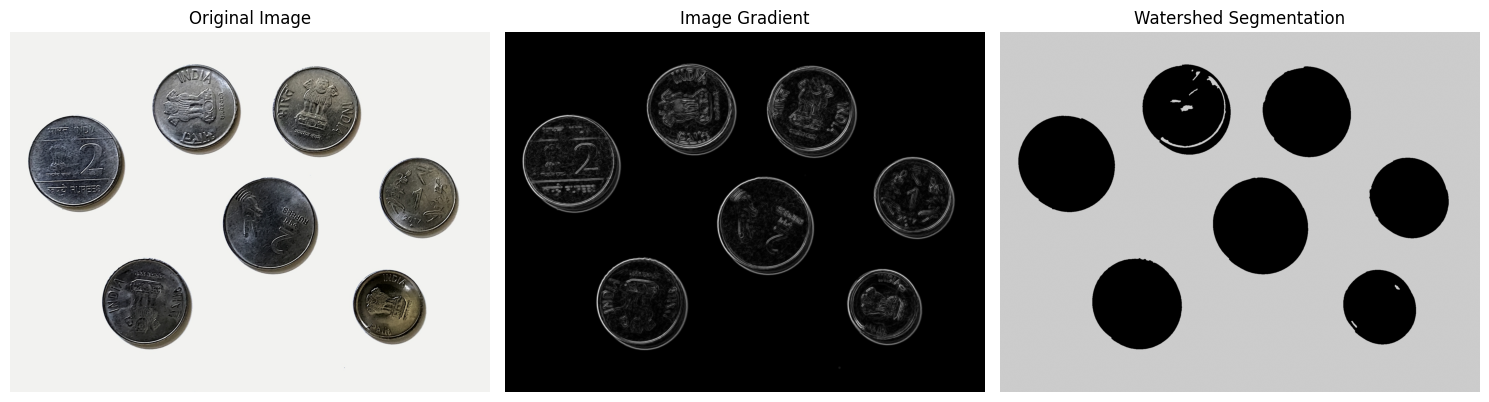

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology, segmentation, feature

# Load an example image
image = io.imread(filename)
image_gray = color.rgb2gray(image)  # Convert to grayscale

# Apply a Gaussian blur to reduce noise
image_blurred = filters.gaussian(image_gray, sigma=2)

# Compute the gradient of the image (edges)
image_gradient = filters.sobel(image_blurred)

# Generate markers for the watershed algorithm
markers = np.zeros_like(image_gray, dtype=np.int32)
markers[image_blurred < 0.2] = 1  # Background
markers[image_blurred > 0.8] = 2  # Foreground

# Apply the watershed algorithm
labels = segmentation.watershed(image_gradient, markers)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_gradient, cmap='gray')
axes[1].set_title('Image Gradient')
axes[1].axis('off')

axes[2].imshow(labels, cmap='nipy_spectral')
axes[2].set_title('Watershed Segmentation')
axes[2].axis('off')

plt.tight_layout()
plt.show()